 # 221710304035 - CSE B4 - MARRU RAHUL

#Problem Statement :
 - This project aims through machine learning techniques at creating a model EmployeeAttrition Classification.
 - Data includes Education,joblevel,jobinvolvement,Dailyrate,MonthlyIncome, Experience,No.ofCompaniesworked,Noofcompanieschanged ,Totalworkexperience
 Yearsatcompany,Yearsatcurrentrole, Yearssincelastpromotion,Yearswithcurrentmanager,Training timeslastyear,Performancerate,Attrition,By following above given data we finding the complete job profile of the person.
 -By this data and by satisfying the above given data we know the sustainable growth.Judges will look for evidence of how employees are engaged in strategic goals employees data and  their experience in company and the level of the person in  the company.
 -And by the graph and the plots we can prove it graphically.
 - And we can the no of employees working in the company.

### Datasets and Inputs:
Given a dataset containing various attributes of EMPLOYEE ATTRITION. The dataset that I am working is downloaded from:

https://www.kaggle.com/HRAnalyticRepository/employee-attrition-data

### In this data:
 - Education
 - joblevel
 -jobinvolvement
 - Dailyrate
 - MonthlyIncome
 - Experience
 - No.ofCompaniesworked
 - Noofcompanieschanged 
 - Totalworkexperience
 - Yearsatcompany
 - Yearsatcurrentrole
 - Yearssincelastpromotion
 - Yearswithcurrentmanager
 - Training timeslastyear
 - Performancerate
 - Attrition

#### USES:
  - This kind of prediction will help companies estimate Employee turnover(attrition) is a major cost to an organization, and predicting turnover is at the forefront of needs of Human Resources (HR) in many organizations.
  - Until now the main stream approach has been to use logisticregression,KNN,etc to model employee attrition.

# LOAD required packages

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
# Reading the data from the dataset
data=pd.read_csv('/content/drive/My Drive/dp/EmployeeAttrition.csv')
data.head()


Education JobInvolvement  ...  Attrition  Attrition_values
0        College           High  ...        Yes                 1
1  Below College         Medium  ...         No                 0
2        College         Medium  ...        Yes                 1
3         Master           High  ...         No                 0
4  Below College           High  ...         No                 0

[5 rows x 15 columns]

In [99]:
# Reading the Dimensions of Your Data form dataset
data.shape

(1470, 15)

#### Descriptive statistics can give you great insight into the shape of each attribute.
- Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute:
- Count
- Mean
- Standard Devaition
- Minimum Value
- 25th Percentile
- 50th Percentile (Median)
- 75th Percentile
- Maximum Value

In [100]:
data.describe().T

count         mean  ...     75%      max
JobLevel                 1470.0     2.063946  ...     3.0      5.0
DailyRate(USD)           1470.0   802.485714  ...  1157.0   1499.0
MonthlyIncome            1470.0  6502.931293  ...  8379.0  19999.0
NoofCompaniesWorked      1470.0     2.693197  ...     4.0      9.0
TotalWorkingYears        1470.0    11.279592  ...    15.0     40.0
YearsAtCompany           1470.0     7.008163  ...     9.0     40.0
YearsInCurrentRole       1470.0     4.229252  ...     7.0     18.0
YearsSinceLastPromotion  1470.0     2.187755  ...     3.0     15.0
YearsWithCurrentManager  1470.0     4.123129  ...     7.0     17.0
TrainingTimesLastYear    1470.0     2.799320  ...     3.0      6.0
Attrition_values         1470.0     0.159184  ...     0.0      1.0

[11 rows x 8 columns]

In [101]:
# Object to check null values form dataset
data.isnull().any()

Education                  False
JobInvolvement             False
JobLevel                   False
DailyRate(USD)             False
MonthlyIncome              False
NoofCompaniesWorked        False
TotalWorkingYears          False
YearsAtCompany             False
YearsInCurrentRole         False
YearsSinceLastPromotion    False
YearsWithCurrentManager    False
TrainingTimesLastYear      False
PerformanceRating          False
Attrition                  False
Attrition_values           False
dtype: bool

In [102]:
#There are no null values in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Education                1470 non-null   object
 1   JobInvolvement           1470 non-null   object
 2   JobLevel                 1470 non-null   int64 
 3   DailyRate(USD)           1470 non-null   int64 
 4   MonthlyIncome            1470 non-null   int64 
 5   NoofCompaniesWorked      1470 non-null   int64 
 6   TotalWorkingYears        1470 non-null   int64 
 7   YearsAtCompany           1470 non-null   int64 
 8   YearsInCurrentRole       1470 non-null   int64 
 9   YearsSinceLastPromotion  1470 non-null   int64 
 10  YearsWithCurrentManager  1470 non-null   int64 
 11  TrainingTimesLastYear    1470 non-null   int64 
 12  PerformanceRating        1470 non-null   object
 13  Attrition                1470 non-null   object
 14  Attrition_values         1470 non-null  

In [103]:
data.select_dtypes(include=['int', 'float']).columns  #numerical

Index(['JobLevel', 'DailyRate(USD)', 'MonthlyIncome', 'NoofCompaniesWorked',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrentManager',
       'TrainingTimesLastYear', 'Attrition_values'],
      dtype='object')

In [104]:
data.Attrition  # target variable Attrition from dataset

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [105]:
data.Attrition_values # target variable Attrition_values from dataset

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_values, Length: 1470, dtype: int64

In [106]:
data['JobInvolvement'].value_counts() # JobInvolvement variable size in different sections

High         868
Medium       375
Very High    144
Low           83
Name: JobInvolvement, dtype: int64

In [107]:
data['Education'].value_counts()  # Education variable size  in different sections

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

In [108]:
data['Education'].unique() 

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [109]:
data['Attrition'].value_counts() # target varible size 

No     1233
Yes     237
Name: Attrition, dtype: int64

In [110]:
data.groupby('Attrition').mean() #  count of certain (Attrition)categories, as well as the means sentiment score for these categories.

JobLevel  DailyRate(USD)  ...  TrainingTimesLastYear  Attrition_values
Attrition                            ...                                         
No         2.145985      812.504461  ...               2.832928          0.000000
Yes        1.637131      750.362869  ...               2.624473          0.987342

[2 rows x 11 columns]

In [111]:
data.groupby('JobInvolvement').mean()  # count of certain (JobInvolvement)categories, as well as the means sentiment score for these categories.

JobLevel  ...  Attrition_values
JobInvolvement            ...                  
High            2.072581  ...          0.140553
Low             2.012048  ...          0.337349
Medium          2.090667  ...          0.189333
Very High       1.972222  ...          0.090278

[4 rows x 11 columns]

In [112]:
data.groupby('MonthlyIncome').mean() # count of certain (MonthlyIncome)categories, as well as the means sentiment score for these categories.

JobLevel  ...  Attrition_values
MonthlyIncome            ...                  
1009                1.0  ...               1.0
1051                1.0  ...               0.0
1052                1.0  ...               0.0
1081                1.0  ...               1.0
1091                1.0  ...               1.0
...                 ...  ...               ...
19859               5.0  ...               1.0
19926               5.0  ...               0.0
19943               5.0  ...               0.0
19973               5.0  ...               0.0
19999               5.0  ...               0.0

[1349 rows x 10 columns]

In [113]:
data.corr() # Correlation refers to the relationship between two variables and how they may or may not change together.

JobLevel  ...  Attrition_values
JobLevel                 1.000000  ...         -0.166296
DailyRate(USD)           0.002966  ...         -0.058966
MonthlyIncome            0.950300  ...         -0.157493
NoofCompaniesWorked      0.142501  ...          0.045267
TotalWorkingYears        0.782208  ...         -0.172225
YearsAtCompany           0.534739  ...         -0.132043
YearsInCurrentRole       0.389447  ...         -0.156401
YearsSinceLastPromotion  0.353885  ...         -0.034019
YearsWithCurrentManager  0.375281  ...         -0.155250
TrainingTimesLastYear   -0.018191  ...         -0.053440
Attrition_values        -0.166296  ...          1.000000

[11 rows x 11 columns]

# Data Visualization

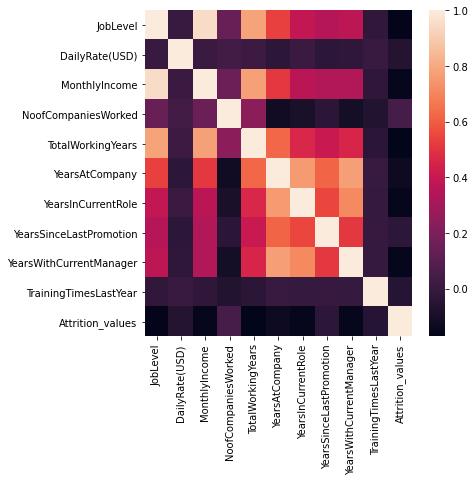

In [114]:
fig = plt.figure(figsize=(6,6)) # heatmap graphplot for correlation of varibales.
sns.heatmap(data.corr())

shows the scatter plot with possibility of several semantic groupings

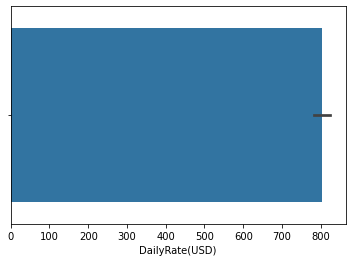

In [115]:
#detection of outlier using boxplot
sns.barplot(data['DailyRate(USD)'])

### Visualize the number of employess that stayed and left company

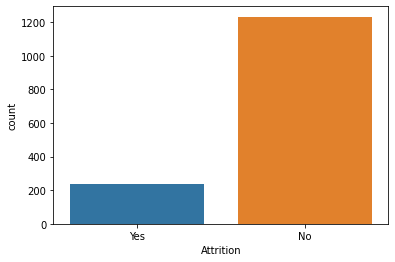

In [116]:
sns.countplot(data['Attrition'])

The above bar chart shows the number of employess that stayed 1300(aprox) and left company 250(aprox)

### Shows the number of employees that left and  corresponding companiesworked.

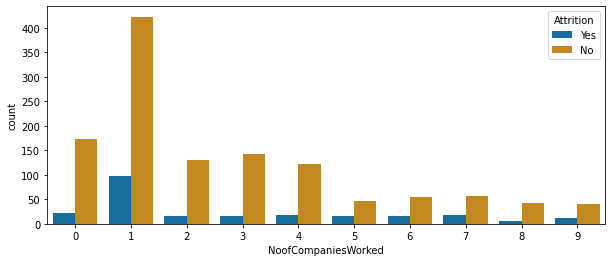

In [117]:
plt.subplots(figsize=(10,4))
sns.countplot(x='NoofCompaniesWorked', hue='Attrition', data = data, palette = 'colorblind')

The above bar chart shows the number of employess that worked on different compaines(NoofCompaniesWorked) with employees leaving(highest 1 company and 8 compaines lowest) and not leaving(highest 1 company and 8 compaines lowest)

 

### Shows the MonthlyIncome with the respective YearsAtCompany

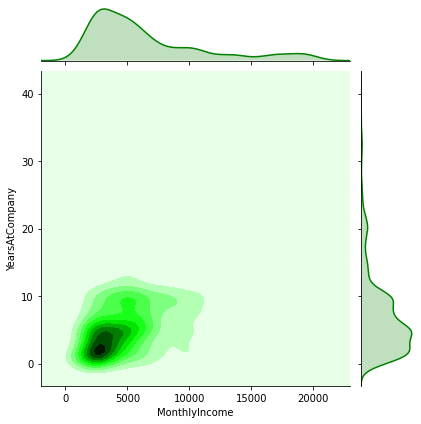

In [118]:
sns.jointplot(x = 'MonthlyIncome', y = 'YearsAtCompany' , data = data , color = 'green', kind = 'kde' )

Joint Plot can also display data using Kernel Density Estimate (KDE) and Hexagons.

### Shows the number of employees that left vs DailyRate(USD)

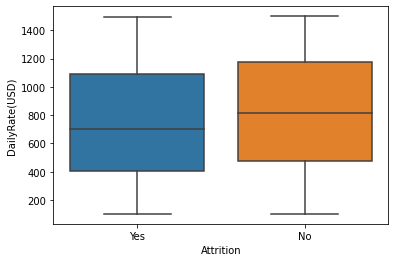

In [119]:
sns.boxplot(x= 'Attrition', y= 'DailyRate(USD)', data = data)

By looking at the above box plot we can say that attrition occur is compared to dailyrate  there is no distinction between them.

### Shows the number of employees that left with corresponding JobInvolvement

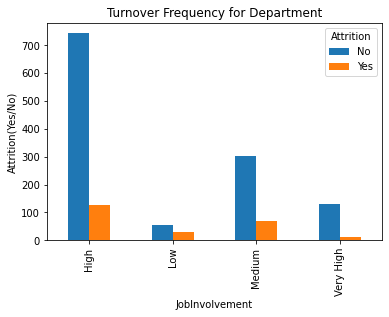

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(data.JobInvolvement,data.Attrition).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('JobInvolvement')
plt.ylabel('Attrition(Yes/No)')
plt.savefig('attrition_bar_chart')

The above bar chart shows the number of employess that with JobInvolvement that employees leaving(highest 750(aprox) and 50(aprox) lowest) and not leaving(highest 120(aprox) and 10(aprox) lowest) in Turnover Frequency for Department.

 

### shows the profile leaving employees

0    1236
1     234
Name: Attrition_values, dtype: int64


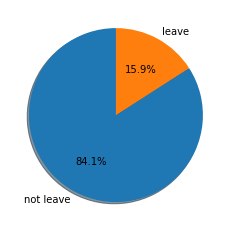

In [121]:
# Getting the cocunt of people who leave and not leave
leftcounts=data['Attrition_values'].value_counts()
print(leftcounts)

# Using matplotlib pie chart and label the pie chart
plt.pie(leftcounts,labels=['not leave','leave'],autopct='%1.1f%%',shadow=True,startangle=90);


### 
The above pie chart shows the % of employees leaving(15.9%) and not leaving(84.1%)

In [122]:
# Getting data of employee who leave and do not leave
leftdata=data[data['Attrition_values']==1]
notleftdata=data[data['Attrition_values']==0]

# Getting the shapes and number of these people
print("shape of leftdata",leftdata.shape)
print("shape of notleftdata",notleftdata.shape)

shape of leftdata (234, 15)
shape of notleftdata (1236, 15)


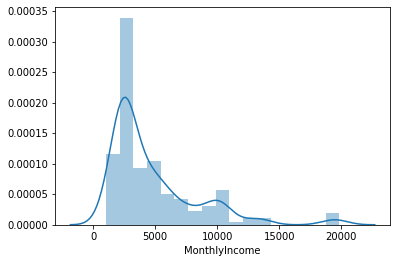

In [123]:
# Getting the distribution of MonthlyIncome 
sns.distplot(leftdata['MonthlyIncome'])

The above plot describes the MonthlyIncome of employee

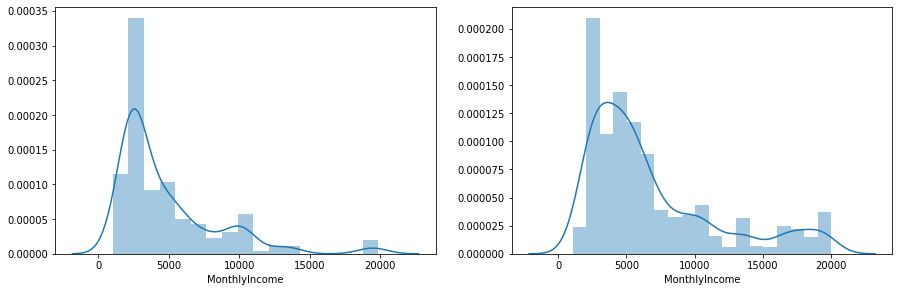

In [124]:
# Create a figure instance and the two subplots
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

sns.distplot(leftdata['MonthlyIncome'],ax=ax1);
sns.distplot(notleftdata['MonthlyIncome'],ax=ax2);

The above plot tells about the MonthlyIncome of leave and not leave employees.There is a somewhat average veriation .

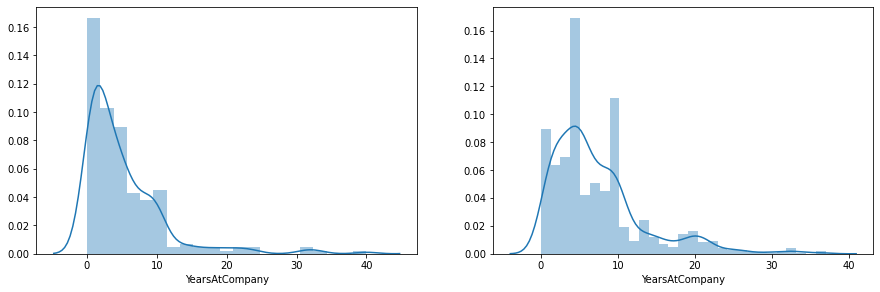

In [125]:
#Create a figure instance and the two subplots
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

sns.distplot(leftdata['YearsAtCompany'],kde=True,ax=ax1)

sns.distplot(notleftdata['YearsAtCompany'],kde=True,ax=ax2)

The above plot tells about the YearsAtCompany of leave and not leave employees.There is a average/little veriation .

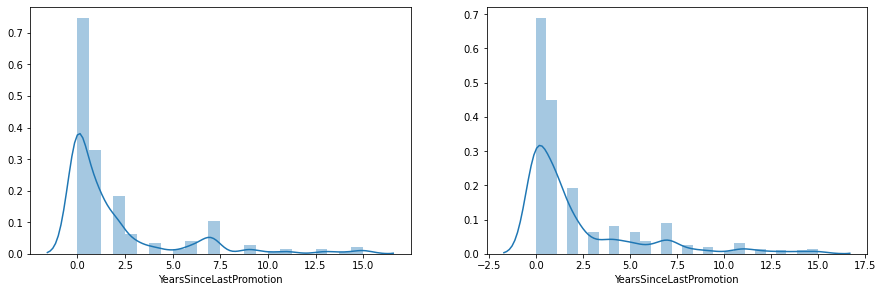

In [126]:
#Create a figure instance and the two subplots
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

sns.distplot(leftdata['YearsSinceLastPromotion'],kde=True,ax=ax1)

sns.distplot(notleftdata['YearsSinceLastPromotion'],kde=True,ax=ax2)

The above plot tells about the YearsSinceLastPromotion of leave and not leave employees.There is a little veriation .

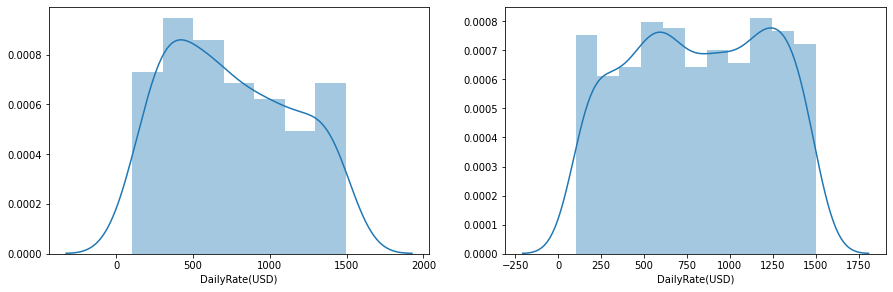

In [127]:
#Create a figure instance and the two subplots
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

sns.distplot(leftdata['DailyRate(USD)'],kde=True,ax=ax1)

sns.distplot(notleftdata['DailyRate(USD)'],kde=True,ax=ax2)

The above plot tells about the DailyRate(USD) of leave and not leave employees.There is a least average veriation .

([<matplotlib.patches.Wedge at 0x7f66215c7908>,
 [Text(-1.0358749572091919, 0.3700852240050325, '2'),
  Text(0.36217574214276244, -1.0386668049973193, '1'),
  Text(1.063238600815349, 0.28199942860973926, '3'),
  Text(0.6047193502406893, 0.9188658810971702, '4'),
  Text(0.17815040477507077, 1.0854779745708703, '5')],
 [Text(-0.5650227039322864, 0.20186466763910862, '39.1%'),
  Text(0.19755040480514313, -0.5665455299985378, '32.5%'),
  Text(0.579948327717463, 0.15381787015076687, '15.0%'),
  Text(0.32984691831310325, 0.5011995715075472, '8.2%'),
  Text(0.0971729480591295, 0.5920788952204746, '5.2%')])

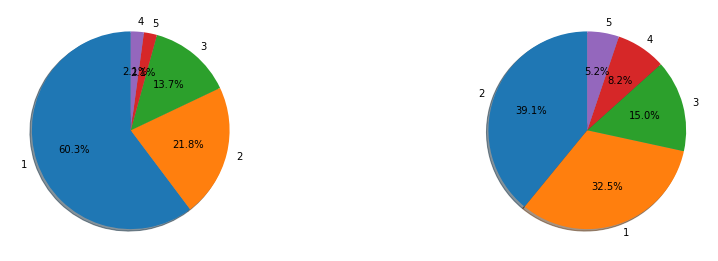

In [128]:
#Create a figure with  two subplots
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

leftworkaccidentcounts=leftdata['JobLevel'].value_counts()
notleftworkaccidentcounts=notleftdata['JobLevel'].value_counts()

# Plot each pie chart in a separate subplot
ax1.pie(leftworkaccidentcounts,labels=leftworkaccidentcounts.index,autopct='%1.1f%%',shadow=True,startangle=90)
ax2.pie(notleftworkaccidentcounts,labels=notleftworkaccidentcounts.index,autopct='%1.1f%%',shadow=True,startangle=90)

The above pie chart shows the JobLevel% of employees leaving(max 60.3% and min 2.2%) and not leaving(max 39.1% and min 5.2%)

([<matplotlib.patches.Wedge at 0x7f6621435ac8>,
 [Text(-1.0422953085444309, -0.35159705599772884, 'High'),
  Text(1.0880684875642843, -0.16157650314810956, 'Medium'),
  Text(0.6324601290015909, 0.8999967695626975, 'Very High'),
  Text(0.15327511125997326, 1.0892689017264026, 'Low')],
 [Text(-0.5685247137515076, -0.19178021236239753, '60.4%'),
  Text(0.5934919023077914, -0.08813263808078702, '24.6%'),
  Text(0.3449782521826859, 0.49090732885238036, '10.6%'),
  Text(0.0836046061418036, 0.5941466736689468, '4.4%')])

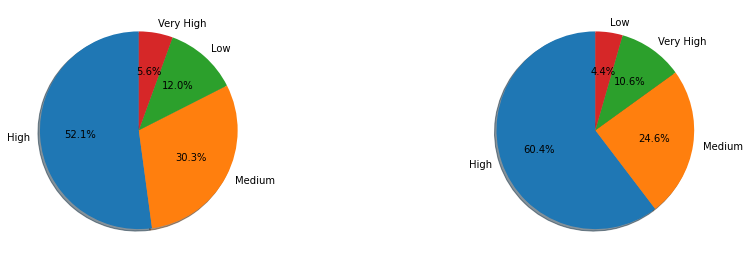

In [129]:
#Create a figure with  two subplots
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

leftdepartmentcounts=leftdata['JobInvolvement'].value_counts()
notleftdepartmentcounts=notleftdata['JobInvolvement'].value_counts()

# Plot each pie chart in a separate subplot
ax1.pie(leftdepartmentcounts,labels=leftdepartmentcounts.index,autopct='%1.1f%%',shadow=True,startangle=90)
ax2.pie(notleftdepartmentcounts,labels=notleftdepartmentcounts.index,autopct='%1.1f%%',shadow=True,startangle=90)

The above pie chart shows the JobInvolvement% of employees leaving(max 52.1% and min 5.6%) and not leaving(max 60.4% and min 4.4%)

([<matplotlib.patches.Wedge at 0x7f66178fd6d8>,
 [Text(-1.0281360362876353, 0.3910706980671787, 'Bachelor'),
  Text(0.1532748945424504, -1.0892689322215157, 'Master'),
  Text(1.0990904984486725, 0.044722211705691774, 'College'),
  Text(0.5953463211756835, 0.92496635498951, 'Below College'),
  Text(0.11998527075500112, 1.0934365710007368, 'Doctor')],
 [Text(-0.5608014743387101, 0.21331128985482473, '38.4%'),
  Text(0.08360448793224566, -0.5941466903026449, '27.6%'),
  Text(0.5995039082447304, 0.024393933657650056, '19.3%'),
  Text(0.32473435700491826, 0.5045271027215508, '11.2%'),
  Text(0.0654465113209097, 0.5964199478185837, '3.5%')])

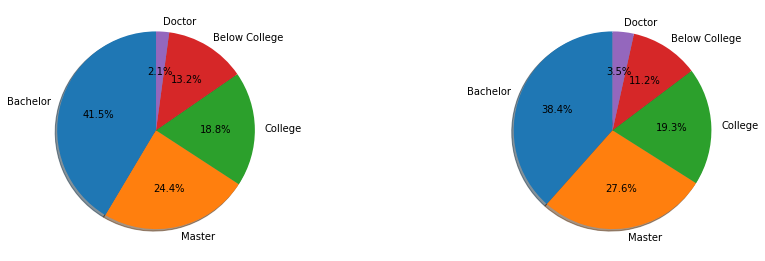

In [130]:
#Create a figure with  two subplots
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

leftdepartmentcounts=leftdata['Education'].value_counts()
notleftdepartmentcounts=notleftdata['Education'].value_counts()

# Plot each pie chart in a separate subplot
ax1.pie(leftdepartmentcounts,labels=leftdepartmentcounts.index,autopct='%1.1f%%',shadow=True,startangle=90)
ax2.pie(notleftdepartmentcounts,labels=notleftdepartmentcounts.index,autopct='%1.1f%%',shadow=True,startangle=90)

The above pie chart shows the Education% of employees leaving(max 41.5% and min 2.1%) and not leaving(max 38.4% and min 3.5%)

#### check Better Heatmaps and Correlation Matrix Plots.

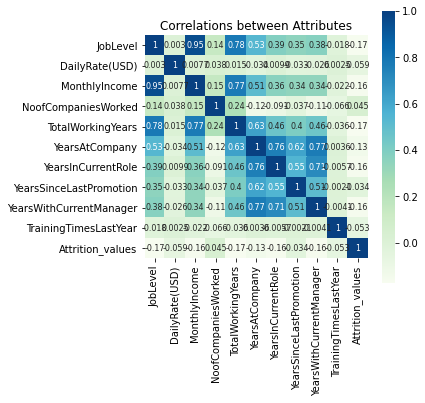

In [131]:
fig = plt.subplots (figsize = (5,5))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

shows the scatter plot with possibility of several semantic groupings

 ### shows the scatter plot with possibility of several semantic groupings

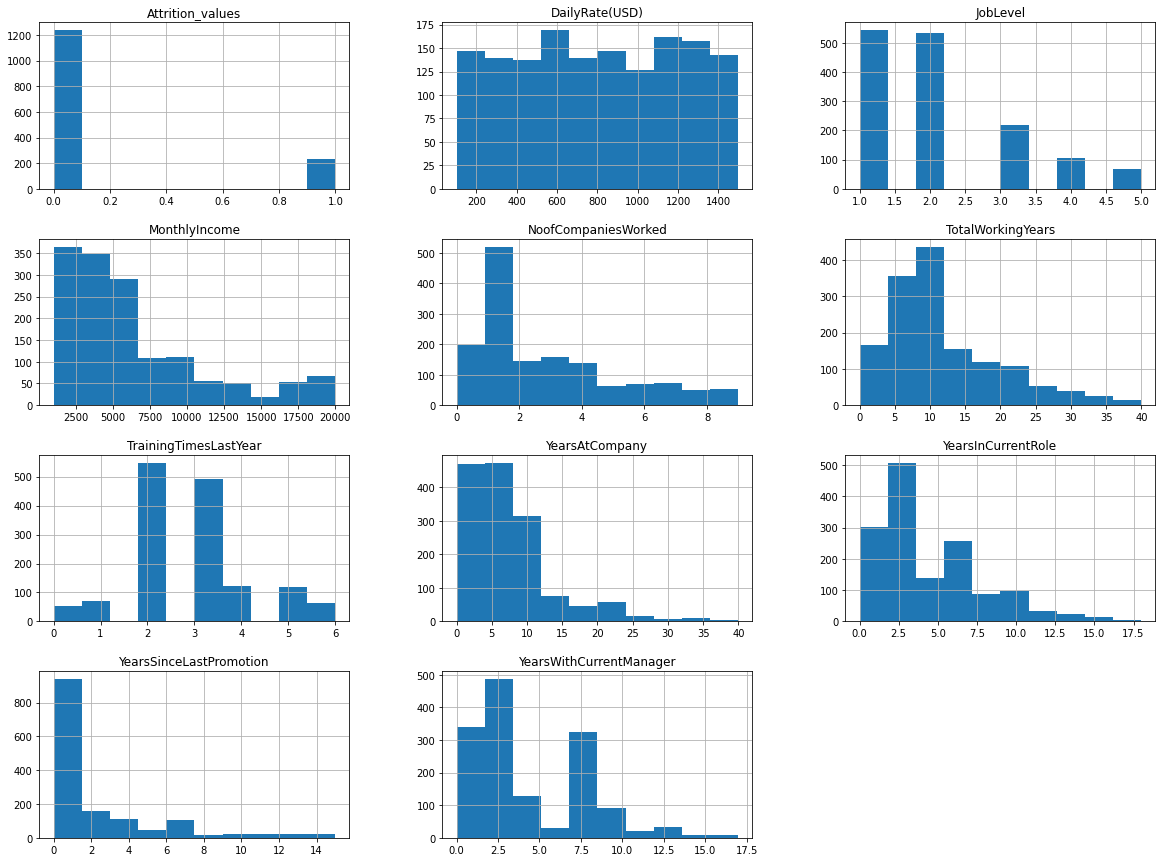

In [132]:
num_bins = 10
data.hist(bins=num_bins, figsize=(20,15))
plt.savefig("attrition_histogram_plots")
plt.show()

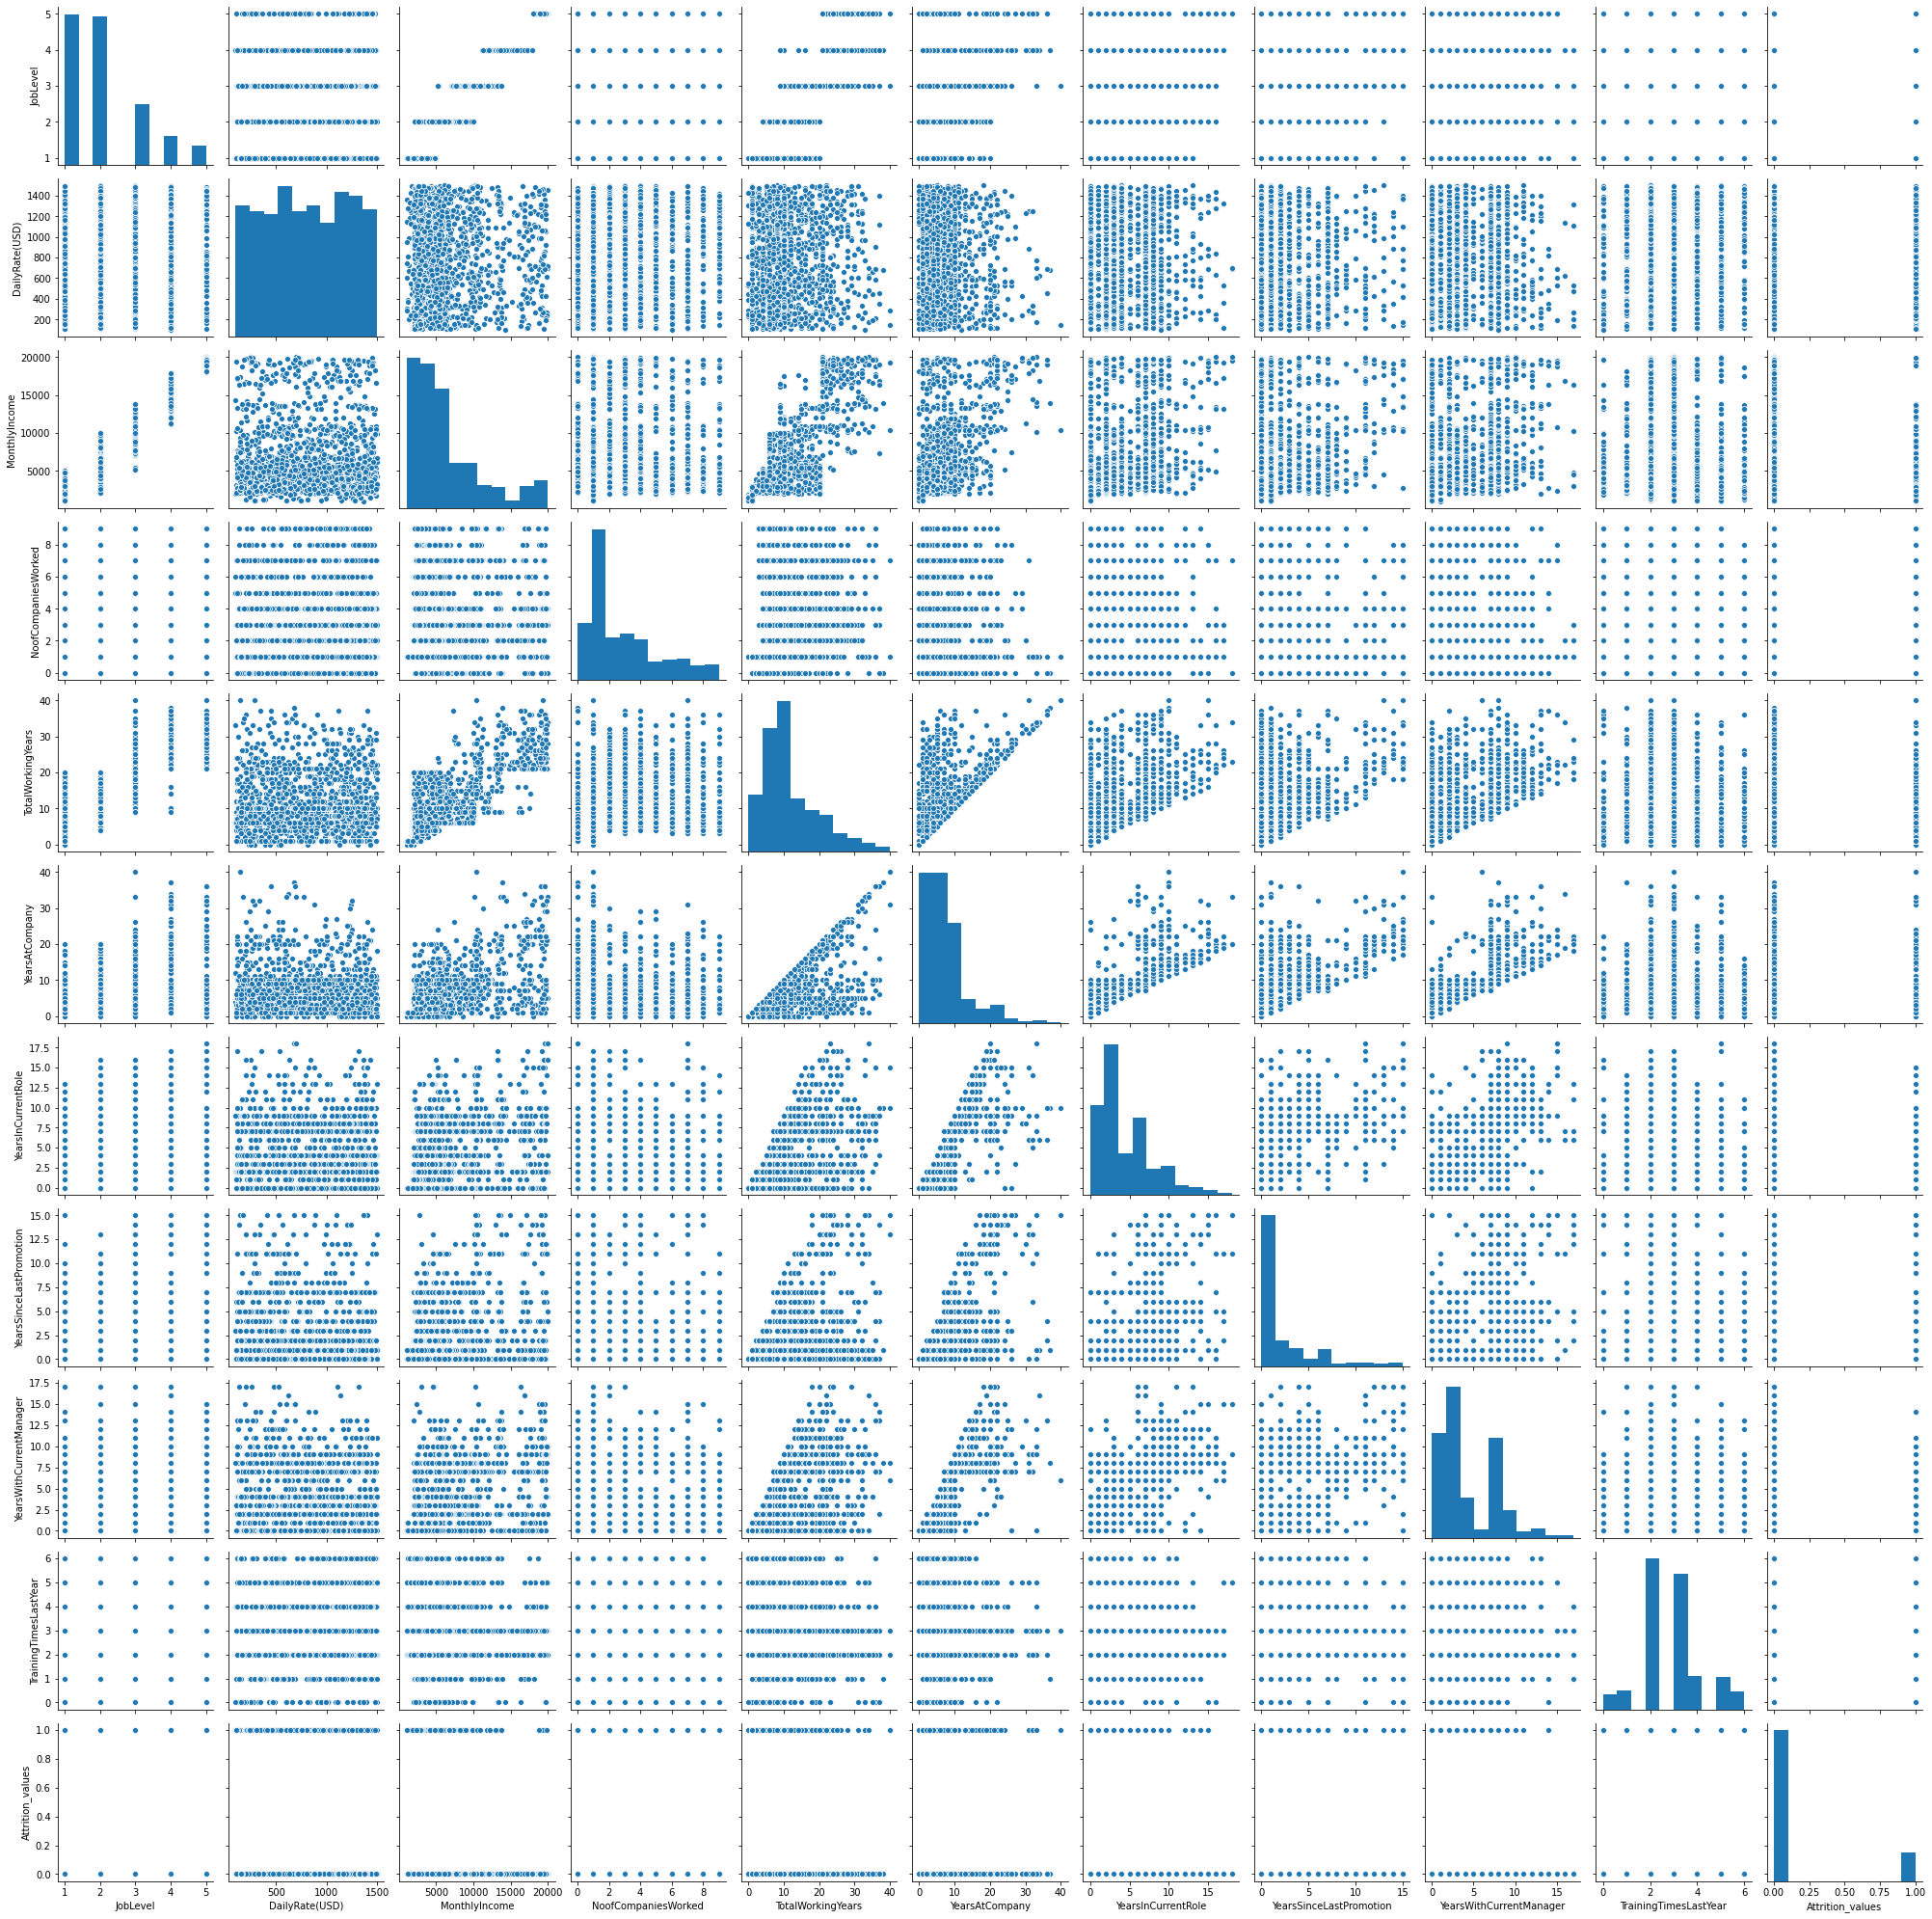

In [133]:
# Plot pairwise relationships in a dataset.
# Seaborn - Visualizing Pairwise Relationship 
# To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.
sns.pairplot(data) 

### 
The above plot chart shows the multiple pairwise bivariate distributions in a dataset of attributes

# Train and Test the model
- After the completion of preprocessing steps, the data splits into training and testing datasets to train the classifier and checks its accuracy.We will be using one or more classification algorithms.We use algorithms like Logistics regression,Random forest,K-nearest neighbors(KNN).

In [134]:
X=data.drop(['Attrition_values', 'JobInvolvement', 'Education', 'PerformanceRating', 'Attrition'], axis=1)
y=data.drop(['JobInvolvement', 'Education', 'PerformanceRating', 'Attrition'], axis=1).iloc[:,-1]


In [135]:
X.head() # The head() function is used to get the first n rows


JobLevel  DailyRate(USD)  ...  YearsWithCurrentManager  TrainingTimesLastYear
0         2            1102  ...                        5                      0
1         2             279  ...                        7                      3
2         1            1373  ...                        0                      3
3         1            1392  ...                        0                      3
4         1             591  ...                        2                      3

[5 rows x 10 columns]

In [136]:
y.head() # The head() function is used to get the first n rows

0    1
1    0
2    1
3    0
4    0
Name: Attrition_values, dtype: int64

####  Preparing Training and Testing Data
#### Storing 80% of the data(rows) into training and remaining 20% of the data(rows) into testing

In [137]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [138]:
print(X_train.shape) #i/p train --> o/p train
print(X_test.shape)  #i/p test --> o/p test
print(y_train.shape) #o/p train
print(y_test.shape)  #o/p test

(1176, 10)
(294, 10)
(1176,)
(294,)


In [139]:
X_train # X_train are the features you are using as input for the training model

JobLevel  DailyRate(USD)  ...  YearsWithCurrentManager  TrainingTimesLastYear
668          1             995  ...                        2                      2
1380         2             682  ...                        4                      2
58           2             655  ...                        7                      3
1095         2             589  ...                        7                      3
88           2             288  ...                        8                      3
...        ...             ...  ...                      ...                    ...
1092         1             950  ...                        3                      3
1192         1             464  ...                        2                      2
1209         3             370  ...                        0                      2
1059         1             660  ...                        0                      3
641          2             379  ...                        3                      3

[1176 rows x 10 columns]

In [140]:
X_test # X_test are the features you are using as input for the testing model

JobLevel  DailyRate(USD)  ...  YearsWithCurrentManager  TrainingTimesLastYear
1328         2             728  ...                        8                      5
725          1             622  ...                        2                      2
74           1             132  ...                        0                      3
1132         2             118  ...                        2                      2
1042         1             981  ...                        3                      5
...        ...             ...  ...                      ...                    ...
961          2             482  ...                        1                      3
865          2            1329  ...                        3                      3
65           4             836  ...                        2                      2
1031         3             377  ...                        3                      1
342          3            1232  ...                       10                      2

[294 rows x 10 columns]

In [141]:
 y_train # Y_train are the expected outcomes/labels for training model

668     0
1380    0
58      0
1095    0
88      0
       ..
1092    0
1192    0
1209    0
1059    0
641     0
Name: Attrition_values, Length: 1176, dtype: int64

In [142]:
y_test # Y_train are the expected outcomes/labels for testing model

1328    0
725     1
74      0
1132    0
1042    0
       ..
961     0
865     0
65      0
1031    1
342     0
Name: Attrition_values, Length: 294, dtype: int64

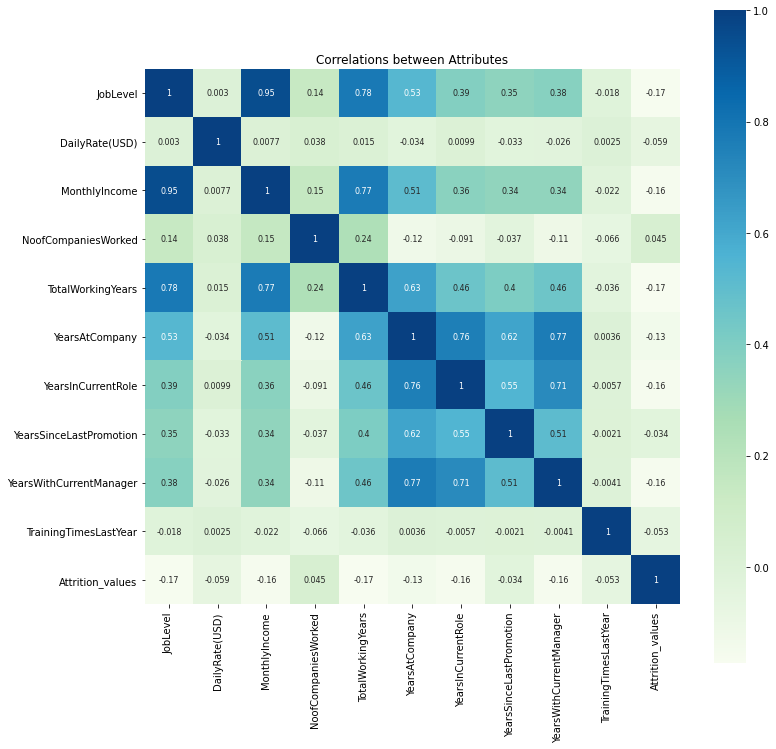

In [143]:
# check Better Heatmaps and Correlation Matrix Plots.
fig = plt.subplots (figsize = (12,12))
sns.heatmap(data.corr (), square = True , cbar = True , annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show()

### we can see from the heatmap:

- The most influential variable is Attrition and Attrition_values.
- Having  DailyRate and MontlyIncome is somewhat correlated.
- Most of the variables have very little correlation to Attrition variable.

#### Before Splitting if you apply standardization--> you are considering whole
#### you are including test data also into training data

In [144]:
## Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [145]:
# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_train

0         1         2  ...         7         8         9
0    -0.976541  0.458008 -0.896293  ... -0.072790 -0.589095 -0.628958
1    -0.082139 -0.322843 -0.228803  ... -0.686416 -0.026549 -0.628958
2    -0.082139 -0.390201 -0.154591  ... -0.379603  0.817271  0.156238
3    -0.082139 -0.554853 -0.303015  ...  0.847649  0.817271  0.156238
4    -0.082139 -1.305767 -0.524184  ...  2.381713  1.098544  0.156238
...        ...       ...       ...  ...       ...       ...       ...
1171 -0.976541  0.345745 -0.947654  ... -0.686416 -0.307822  0.156238
1172 -0.976541 -0.866694 -0.852269  ... -0.072790 -0.589095 -0.628958
1173  0.812263 -1.101199  0.886894  ... -0.686416 -1.151641 -0.628958
1174 -0.976541 -0.377727 -0.890633  ... -0.686416 -1.151641  0.156238
1175 -0.082139 -1.078747 -0.026921  ...  0.847649 -0.307822  0.156238

[1176 rows x 10 columns]

In [146]:
#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test))
scaled_X_test

0         1         2  ...         7         8         9
0    0.045268 -0.094287 -0.538526  ...  0.984788  1.041821  1.637422
1   -0.905357 -0.351947 -0.492301  ... -0.650961 -0.619818 -0.587857
2   -0.905357 -1.543018 -0.652835  ... -0.650961 -1.173697  0.153903
3    0.045268 -1.577049 -0.288275  ... -0.323812 -0.619818 -0.587857
4   -0.905357  0.520695 -0.624599  ... -0.650961 -0.342878  1.637422
..        ...       ...       ...  ...       ...       ...       ...
289  0.045268 -0.692253 -0.377081  ... -0.323812 -0.896757  0.153903
290  0.045268  1.366598 -0.407594  ... -0.650961 -0.342878  0.153903
291  1.946519  0.168235  2.015441  ... -0.650961 -0.619818 -0.587857
292  0.995893 -0.947483  0.954324  ...  0.657638 -0.342878 -1.329617
293  0.995893  1.130815  0.281904  ...  0.657638  1.595701 -0.587857

[294 rows x 10 columns]

# Training and Testing the model with Algorithms

- K-nearest neighbors(KNN)
- Logistics regression
- Random forest

#  K-nearest neighbors(KNN) Algorithm Model

In [147]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [148]:
# Predictions on the data
#predict function--> gives the predicted values for training model
# Syntax:objectname.predict(Input)
y_train_pred_knn = knn.predict(scaled_X_train)
y_train_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [149]:
# Checks the confusion_matrix for training model
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred_knn)
confusion_matrix

array([[993,   0],
       [183,   0]])

In [150]:
# Checks the accuracy, classification report for training model
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       993
           1       0.00      0.00      0.00       183

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.71      0.84      0.77      1176



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
# Checks the accuracy for K-nearest neighbors(KNN) Algorithm for train phase
acc_knn = metrics.accuracy_score(y_train, y_train_pred_knn)
acc_knn

0.8443877551020408

In [152]:
# Predictions on the data
#predict function--> gives the predicted values for testing model
# Syntax:objectname.predict(Input)
y_test_pred_knn = knn.predict(scaled_X_test)
y_test_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [153]:
# Checks the confusion_matrix for testing model
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred_knn)
confusion_matrix

array([[240,   3],
       [ 51,   0]])

In [154]:
# Checks the accuracy, classification report for testing model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       243
           1       0.00      0.00      0.00        51

    accuracy                           0.82       294
   macro avg       0.41      0.49      0.45       294
weighted avg       0.68      0.82      0.74       294



In [155]:
# Checks the accuracy for K-nearest neighbors(KNN) Algorithm for test phase
acc_knn = metrics.accuracy_score(y_test, y_test_pred_knn)
acc_knn

0.8163265306122449

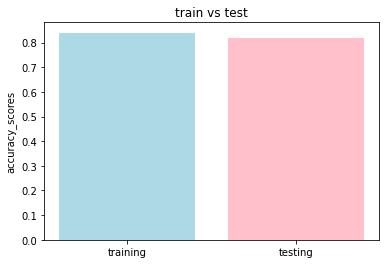

In [156]:
models = ['training','testing']
accuracy_scores = [0.84,0.82]
plt.bar(models, accuracy_scores, color=['lightblue', 'pink'])
plt.ylabel("accuracy_scores")
plt.title("train vs test")
plt.show()



- Here,Training accuracy in model is 84%
- Here,Testing accuracy in model is 82%

# LogisticRegression Algorithm Model

In [157]:
# Model Building:
from sklearn.linear_model import LogisticRegression

In [158]:
# After scaling the features, the solvers all perform better and sag 
lr = LogisticRegression(multi_class = 'auto', solver = 'sag', max_iter = 1000)


In [159]:
# Apply the lr object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
lr.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
# Predictions on the data
#predict function--> gives the predicted values for training model
# Syntax:objectname.predict(Input)
y_train_pred_lr = lr.predict(scaled_X_train)
y_train_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
# Checks the confusion_matrix for training model
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred_lr)
confusion_matrix

array([[993,   0],
       [183,   0]])

In [162]:
# Checks the accuracy, classification report for training model
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       993
           1       0.00      0.00      0.00       183

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.71      0.84      0.77      1176



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
# Checks the accuracy for LogisticRegression Algorithm for train phase
acc_lr = metrics.accuracy_score(y_train, y_train_pred_lr)
acc_lr

0.8443877551020408

In [164]:
# Predictions on the data
#predict function--> gives the predicted values for testing model
# Syntax:objectname.predict(Input)
y_test_pred_lr = lr.predict(scaled_X_test)
y_test_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [165]:
 # Checks the confusion_matrix for testing model
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred_lr)
confusion_matrix

array([[243,   0],
       [ 51,   0]])

In [166]:
# Checks the accuracy, classification report for testing model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       0.00      0.00      0.00        51

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.83      0.75       294



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
# Checks the accuracy for LogisticRegression Algorithm for test phase
acc_lr = metrics.accuracy_score(y_test, y_test_pred_lr)
acc_lr

0.826530612244898

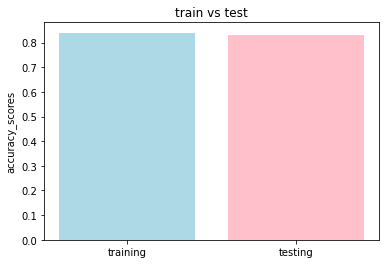

In [168]:
models = ['training','testing']
accuracy_scores = [0.84,0.83]
plt.bar(models, accuracy_scores, color=['lightblue', 'pink'])
plt.ylabel("accuracy_scores")
plt.title("train vs test")
plt.show()



- Here,Training accuracy in model is 84%
- Here,Testing accuracy in model is 83%

# Random Forest Classifier Algorithm Model

In [169]:
# Model Building:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 99, criterion = 'entropy', oob_score = True)

In [170]:
# Apply the rfc object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
rfc.fit(scaled_X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=99, verbose=0,
                       warm_start=False)

In [171]:
# Predictions on the data
#predict function--> gives the predicted values for training model
# Syntax:objectname.predict(Input)
y_train_pred_rfc = rfc.predict(scaled_X_train)
y_train_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

In [172]:
# Checks the confusion_matrix for training model
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred_rfc)
confusion_matrix

array([[993,   0],
       [  0, 183]])

In [173]:
# Checks the accuracy, classification report for training model
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      1.00      1.00       183

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [174]:
# Check the accuracy for Random Forest Classifier Algorithm for train phase
acc_rfc = metrics.accuracy_score(y_train, y_train_pred_rfc)
acc_rfc

1.0

In [175]:
# Predictions on the data
#predict function--> gives the predicted values for testing model
# Syntax:objectname.predict(Input)
y_test_pred_rfc = rfc.predict(scaled_X_test)
y_test_pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [176]:
# Checks the confusion_matrix for testing model
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred_rfc)
confusion_matrix

array([[236,   7],
       [ 47,   4]])

In [177]:
# Checks the accuracy, classification report for testing model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90       243
           1       0.36      0.08      0.13        51

    accuracy                           0.82       294
   macro avg       0.60      0.52      0.51       294
weighted avg       0.75      0.82      0.76       294



In [178]:
# Check the accuracy for Random Forest Classifier Algorithm for test phase
acc_rfc = metrics.accuracy_score(y_test, y_test_pred_rfc)
acc_rfc

0.8163265306122449

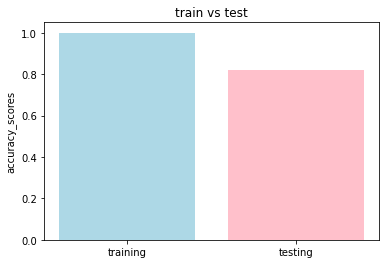

In [179]:
models = ['training','testing']
accuracy_scores = [1.00,0.82]
plt.bar(models, accuracy_scores, color=['lightblue', 'pink'])
plt.ylabel("accuracy_scores")
plt.title("train vs test")
plt.show()



- Here,Training accuracy in model is 100%
- Here,Testing accuracy in model is 82%

# GridSearchCV

In [180]:
#Passing list of values  in a dictionary to find the optimum value for each parameter
grid_param = {
    'criterion' : ['entropy','gini'],
    
    'max_depth' : range(1,11,2),
    'min_samples_leaf' : range(1,6,3)
}


In [181]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV


# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [182]:
# return the optimal parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1}

In [183]:
#Build the model with best parameters
#Initialized the DT Classifier
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 1, min_samples_leaf = 1)

# We need to fit the model to the data
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification Report of actual values and predicted value(GridSearch)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       0.00      0.00      0.00        51

    accuracy                           0.83       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.68      0.83      0.75       294



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
# Check the accuracy for Random Forest Classifier Algorithm after the gridsearchcv
acc_dt = metrics.accuracy_score(y_test, pred_test)
acc_dt

0.826530612244898

### Best among LogisticRegression , RandomForestClassifier, K-nearest neighbors(KNN)

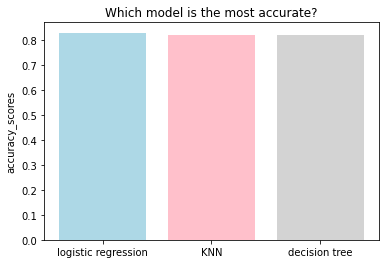

In [186]:
models = ['logistic regression','KNN','decision tree']
accuracy_scores = [0.83, 0.82, 0.82]
plt.bar(models, accuracy_scores, color=['lightblue', 'pink','lightgrey'])
plt.ylabel("accuracy_scores")
plt.title("Which model is the most accurate?")
plt.show()

### Almost these LogisticRegression , RandomForestClassifier, K-nearest neighbors Algorithm shows best Accuracy as LogisticRegression is somewhat very little high with in 83% accuracy_score.